In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

df = pd.read_csv("sp500_historical_data_cleaned.csv")
df.describe()

,Close,High,Low,Open,Volume
count,1535.000000,1535.000000,1535.000000,1535.000000,1.535000e+03
mean,4066.804645,4088.892397,4041.517055,4065.902456,4.246306e+09
std,892.126701,893.743214,890.620427,892.322155,1.021286e+09
min,2237.400000,2300.730000,2191.860000,2290.710000,1.296530e+09
25%,3288.710000,3305.885000,3269.920000,3286.915000,3.635455e+09
50%,4101.230000,4129.480000,4072.560000,4095.410000,4.007510e+09
75%,4536.645000,4558.390000,4516.745000,4540.705000,4.584180e+09
max,6118.710000,6128.180000,6088.740000,6121.430000,9.976520e+09


In [42]:
print(df.describe().round(3))

          Close      High       Low      Open        Volume
count  1535.000  1535.000  1535.000  1535.000  1.535000e+03
mean   4066.805  4088.892  4041.517  4065.902  4.246306e+09
std     892.127   893.743   890.620   892.322  1.021286e+09
min    2237.400  2300.730  2191.860  2290.710  1.296530e+09
25%    3288.710  3305.885  3269.920  3286.915  3.635455e+09
50%    4101.230  4129.480  4072.560  4095.410  4.007510e+09
75%    4536.645  4558.390  4516.745  4540.705  4.584180e+09
max    6118.710  6128.180  6088.740  6121.430  9.976520e+09


In [43]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date    Close     High      Low     Open      Volume
0 2019-01-02  2510.03  2519.49  2467.47  2476.96  3733160000
1 2019-01-03  2447.89  2493.14  2443.96  2491.92  3858830000
2 2019-01-04  2531.94  2538.07  2474.33  2474.33  4234140000
3 2019-01-07  2549.69  2566.16  2524.56  2535.61  4133120000
4 2019-01-08  2574.41  2579.82  2547.56  2568.11  4120060000


In [44]:
for col in df.columns:
    if col !="Date":
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

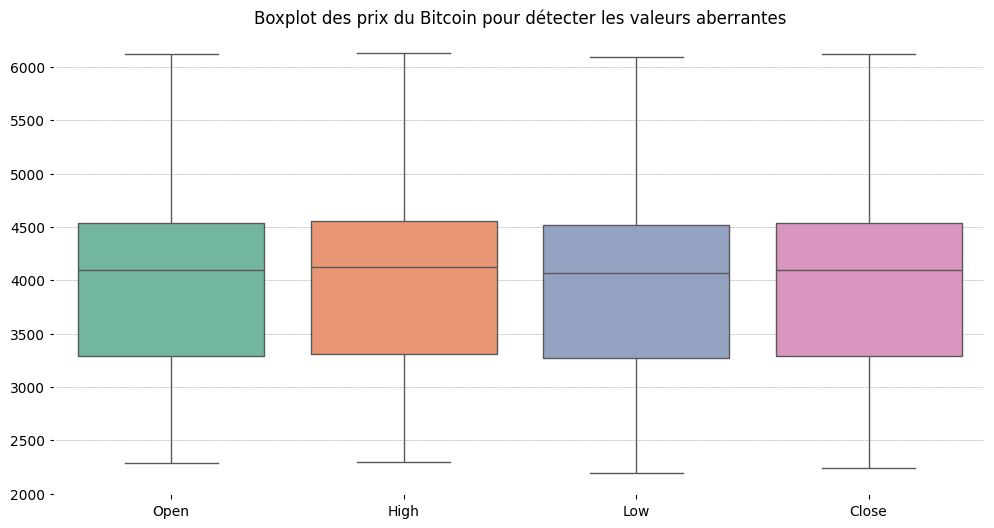

In [45]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette="Set2")
plt.title("Boxplot des prix du Bitcoin pour détecter les valeurs aberrantes")
plt.show()

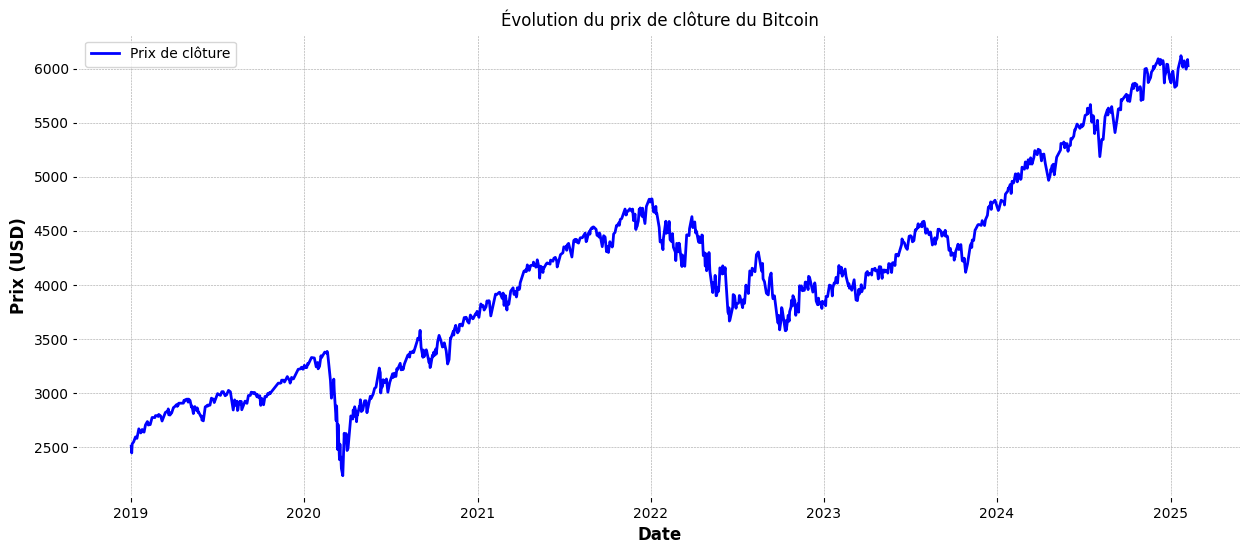

In [46]:

plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Close"], label="Prix de clôture", color="blue")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de clôture du Bitcoin")
plt.legend()
plt.show()

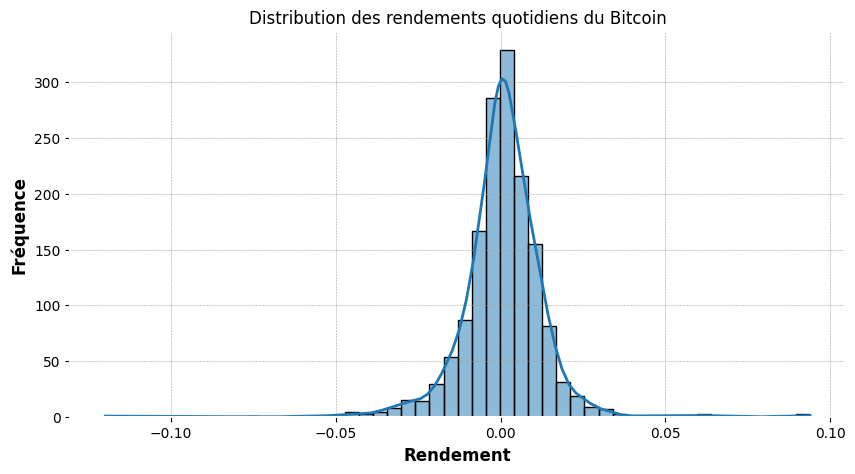

In [47]:
df["Daily Return"] = df["Close"].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(df["Daily Return"].dropna(), bins=50, kde=True)
plt.title("Distribution des rendements quotidiens du Bitcoin")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()

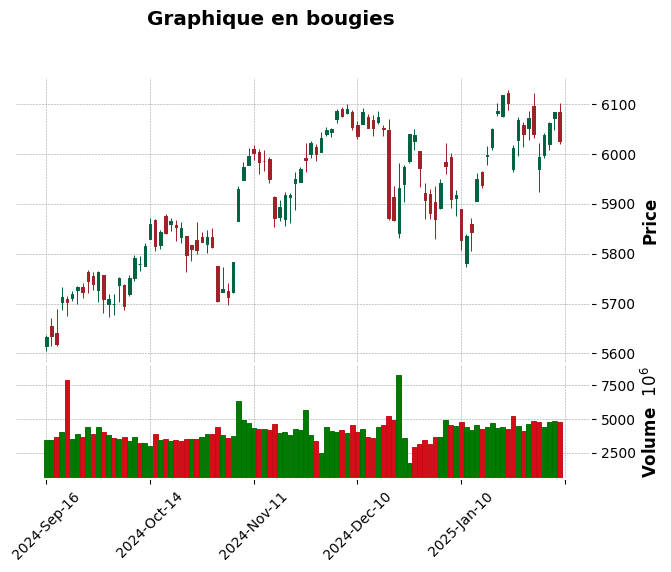

In [48]:

df.set_index('Date', inplace=True)
mpf.plot(df.tail(100), type='candle', style='charles', volume=True, title="Graphique en bougies")

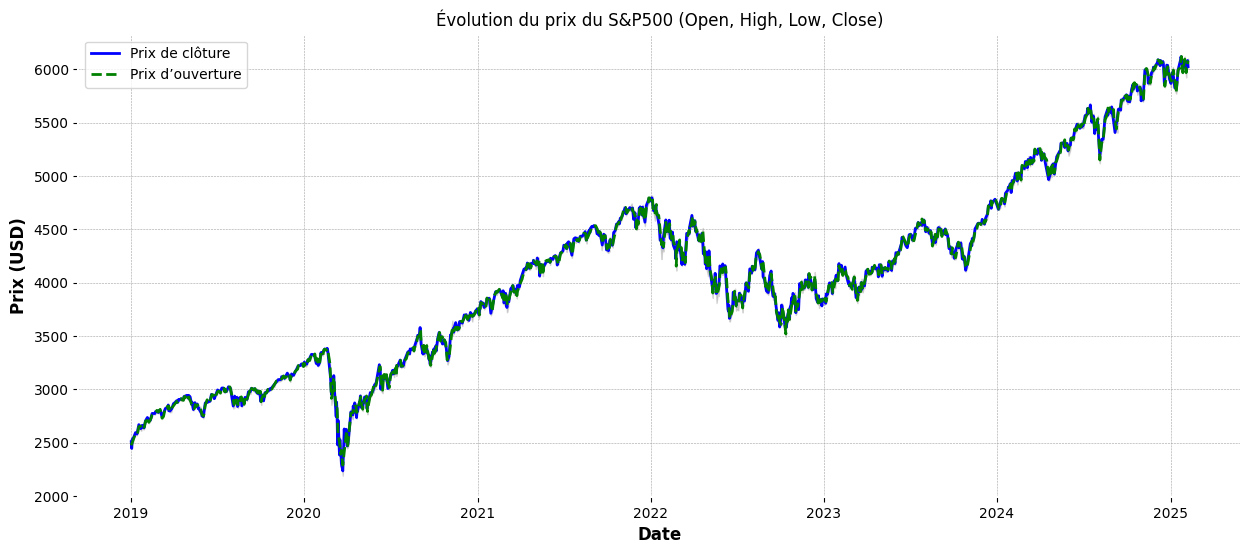

In [49]:
plt.figure(figsize=(15, 6))

# Tracer les prix de clôture et d'ouverture
plt.plot(df.index, df["Close"], label="Prix de clôture", color="blue")
plt.plot(df.index, df["Open"], label="Prix d’ouverture", color="green", linestyle="dashed")

# Remplir entre le prix le plus bas et le plus haut
plt.fill_between(df.index, df["Low"], df["High"], color="gray", alpha=0.3)

# Ajouter les labels et la légende
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix du S&P500 (Open, High, Low, Close)")
plt.legend()

# Afficher le graphique
plt.show()

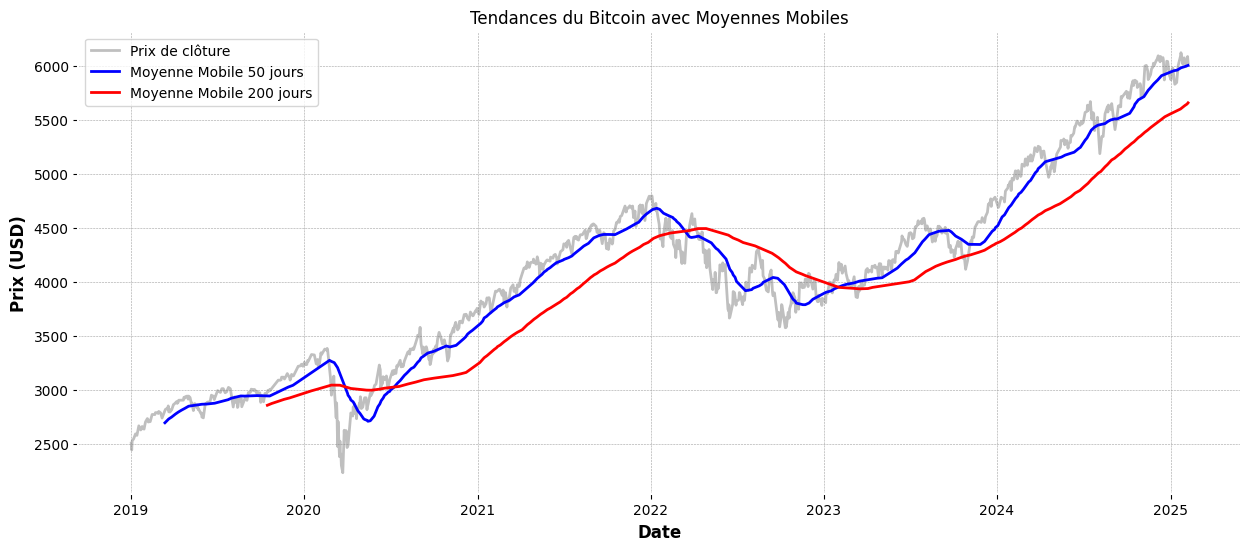

In [50]:
# Calcul des moyennes mobiles
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()

# Création du graphique
plt.figure(figsize=(15, 6))

# Tracer les prix de clôture et les moyennes mobiles
plt.plot(df.index, df["Close"], label="Prix de clôture", color="gray", alpha=0.5)
plt.plot(df.index, df["SMA_50"], label="Moyenne Mobile 50 jours", color="blue")
plt.plot(df.index, df["SMA_200"], label="Moyenne Mobile 200 jours", color="red")

# Ajouter les labels et la légende
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Tendances du Bitcoin avec Moyennes Mobiles")
plt.legend()

# Afficher le graphique
plt.show()


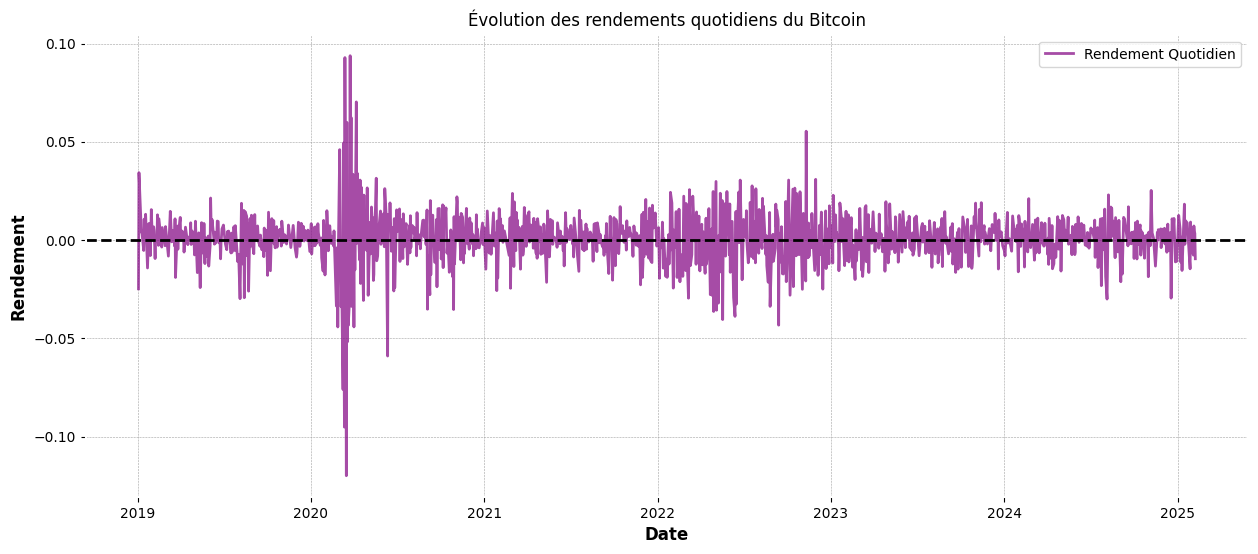

In [51]:
plt.figure(figsize=(15, 6))

# Tracer le rendement quotidien
plt.plot(df.index, df["Daily Return"], label="Rendement Quotidien", color="purple", alpha=0.7)

# Ajouter une ligne horizontale à 0 pour référence
plt.axhline(y=0, color="black", linestyle="dashed")

# Ajouter les labels et la légende
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.title("Évolution des rendements quotidiens du Bitcoin")
plt.legend()

# Afficher le graphique
plt.show()


In [52]:
volatility = df["Daily Return"].std() * (252 ** 0.5)
print(f"Volatilité Annuelle : {volatility:.2%}")

Volatilité Annuelle : 20.04%


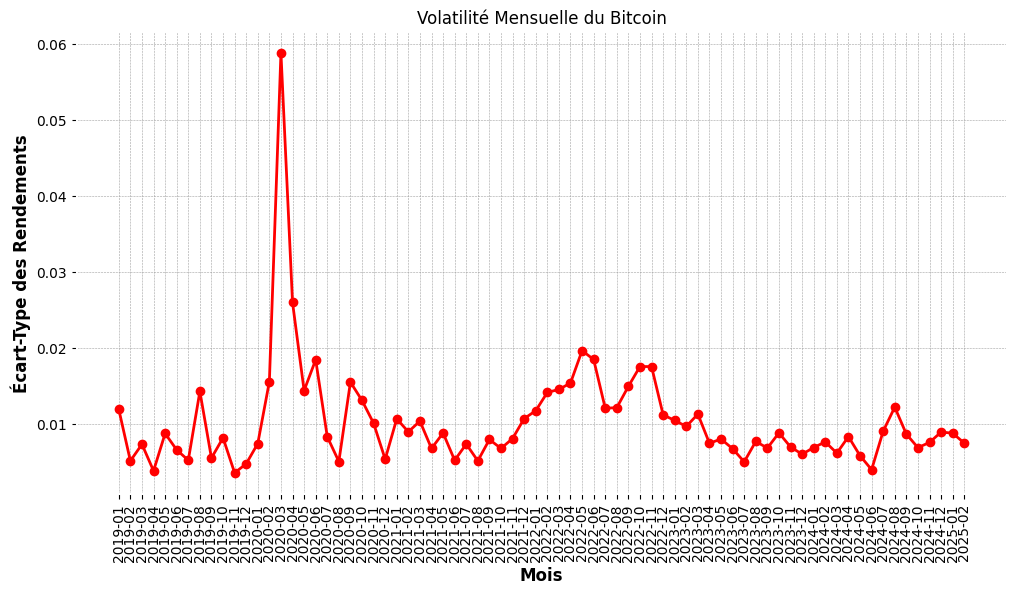

In [53]:
# Créer une colonne "Year-Month" à partir de l'index
df["Year-Month"] = df.index.to_period("M")

# Calcul de la volatilité mensuelle (écart-type des rendements quotidiens)
monthly_volatility = df.groupby("Year-Month")["Daily Return"].std()

# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(monthly_volatility.index.astype(str), monthly_volatility, marker='o', color="red")

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=90)

# Ajouter le titre et les labels
plt.title("Volatilité Mensuelle du Bitcoin")
plt.xlabel("Mois")
plt.ylabel("Écart-Type des Rendements")

# Afficher le graphique
plt.show()
